In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Homework 8: Confidence Intervals

**Helpful Resource:**

- [Python Reference](http://data8.org/fa24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Reading**: 

* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation)

Please complete this notebook by filling in the cells provided. **Before you begin, execute the cell below to setup the notebook by importing some helpful libraries.** Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, **please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is **due Wednesday, 10/30 at 5:00pm PT**. Submissions after this time will be accepted for 24 hours and will incur a 20% penalty. Any submissions later than this 24 hour period will not be accepted unless an extension has been granted as per the [policies](http://data8.org/fa24/policies/) page. Turn it in by Tuesday, 10/29 at 5:00pm PT for 5 extra credit points.

<span style="color:red">**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**</span>

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the [policies](http://data8.org/fa24/policies/#learning-cooperatively) page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday through Friday in [Warren Hall](https://www.berkeley.edu/map?warren) 101B. The office hours schedule appears [here](https://www.data8.org/fa24/schedule/).

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. Thai Restaurants in Berkeley

Jonathan and Bing are trying to see what the best Thai restaurant in Berkeley is. They survey 1,500 UC Berkeley students selected uniformly at random and ask each student which Thai restaurant is the best. (*Note: This data is fabricated for the purposes of this homework.*) The choices of Thai restaurants are [Lucky House](https://www.google.com/maps/place/Lucky+House+Thai+Cuisine/@37.8707428,-122.270045,15.32z/data=!4m5!3m4!1s0x80857e9e69a8c921:0x7b6d80f58406fb26!8m2!3d37.8721393!4d-122.2672699), [Imm Thai](https://www.google.com/maps/place/Imm+Thai+Street+Food/@37.8704926,-122.2687372,15.51z/data=!4m5!3m4!1s0x80857e9eec4f1e63:0x5f54d96f0dccdb72!8m2!3d37.8719079!4d-122.2691186), [Thai Temple](https://www.google.com/maps/place/Wat+Mongkolratanaram/@37.8689514,-122.2698649,14.75z/data=!4m5!3m4!1s0x80857e886e39daf1:0xe309caa1b5710fc0!8m2!3d37.8563633!4d-122.2707584), and [Thai Basil](https://www.google.com/maps/place/Thai+Basil/@37.8691911,-122.266539,15.37z/data=!4m5!3m4!1s0x80857c2f6ae0e2f1:0x6978b6e8a72d58d4!8m2!3d37.868327!4d-122.258081). After compiling the results, Jonathan and Bing release the following percentages of votes that each restaurant received, from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 53% |
|Thai Temple | 25% |
|Thai Basil | 14% |

These percentages represent a uniform random sample of the population of UC Berkeley students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the population (i.e. all UC Berkeley students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of Jonathan and Bing's survey.

In [3]:
# Just run this cell
votes = Table.read_table('votes.csv')
votes

Vote
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House


---

**Question 1.1.** Complete the function `one_resampled_percentage` below. It should return Imm Thai's ***percentage*** of votes after taking the original table (`tbl`) and performing one bootstrap sample of it. Remember that a percentage is between 0 and 100. **(8 Points)**

*Note 1:* `tbl` will always be in the same format as `votes`.

*Note 2:* This function should be completed **without** `.group` or `.pivot`. Using these functions will cause your code to timeout.

*Hint:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**


In [23]:
def one_resampled_percentage(tbl):
    resampled = tbl.sample(with_replacement=True)
    num_yes = resampled.where('Vote', 'Imm Thai').num_rows
    return num_yes / resampled.num_rows * 100

one_resampled_percentage(votes)

53.266666666666666

In [18]:
grader.check("q1_1")

q1_1 results: All test cases passed!

---

**Question 1.2.** Complete the `percentages_in_resamples` function such that it simulates and returns an array of **2023 elements**, where each element represents a bootstrapped estimate of the percentage of voters who will vote for Imm Thai. You should use the `one_resampled_percentage` function you wrote above. **(8 Points)**

_Note:_ We perform our simulation with **only 2023 trials** in this problem to reduce the runtime, but we should generally use more repetitions.


In [24]:
def percentages_in_resamples():
    percentage_imm = make_array()
    for i in np.arange(2023):
        percentage_imm = np.append(percentage_imm, one_resampled_percentage(votes))
    return percentage_imm

In [25]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2023 bootstrap estimates of the percentage of voters who voted for Imm Thai. 

*Note:* This might take a few seconds to run.

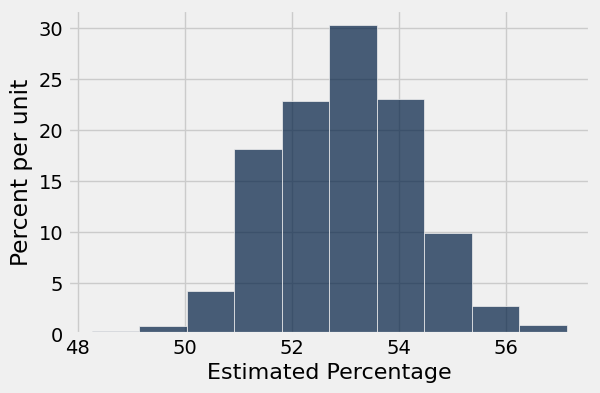

In [26]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

---

**Question 1.3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. Compute the lower and upper ends of the interval, named `imm_lower_bound` and `imm_upper_bound` respectively. **(8 Points)**

*Hint:* If you are stuck on this question, try looking over [Chapter 13.1](https://inferentialthinking.com/chapters/13/1/Percentiles.html) of the textbook.


In [30]:
imm_lower_bound = percentile(2.5, resampled_percentages)
imm_upper_bound = percentile(97.5, resampled_percentages)
print(f"Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [{imm_lower_bound:.2f}, {imm_upper_bound:.2f}]")

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [50.47, 55.47]


In [28]:
grader.check("q1_3")

q1_3 results: All test cases passed!

---

**Question 1.4.** The survey results seem to indicate that Imm Thai is beating all the other Thai restaurants among the voters. We would like to use confidence intervals to determine a range of likely values for Imm Thai's true lead over all the other restaurants combined. The calculation for Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined is:

$$\text{Imm Thai's percent of Vote} - (\text{100 percent} - \text{Imm Thai's percent of Vote})$$

Define the function `one_resampled_difference` that returns **exactly one value** of Imm Thai's percentage lead over Lucky House, Thai Temple, and Thai Basil combined from one bootstrap sample of `tbl`. **(8 Points)**

*Hint 1:* Imm Thai's lead can be negative.

*Hint 2:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**

*Note:* If the skeleton code provided within the function is not helpful for you, feel free to approach the question using your own variables.


In [31]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    imm_percentage = bootstrap.where('Vote', 'Imm Thai').num_rows / bootstrap.num_rows * 100
    return 2 * imm_percentage - 100

In [32]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 1.5.** Write a function called `leads_in_resamples` that returns an array of 2023 elements representing the bootstrapped estimates (the result of calling `one_resampled_difference`) of Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Afterwards, run the cell to plot a histogram of the resulting samples. **(8 Points)**

*Hint:* If you see an error involving `NoneType`, consider what components a function needs to have!


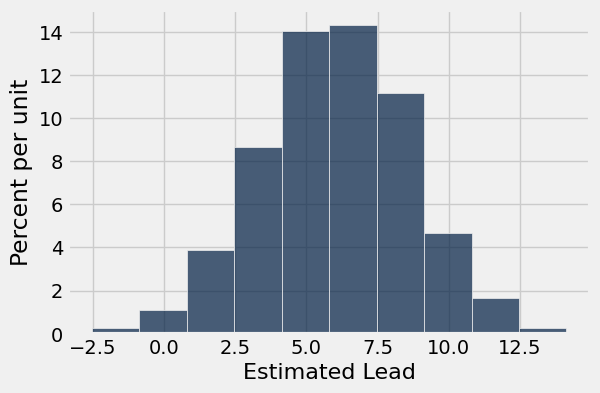

In [33]:
def leads_in_resamples():
    leads = make_array()
    for i in np.arange(2023):
        leads = np.append(leads, one_resampled_difference(votes))
    return leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

<!-- END QUESTION -->

---

**Question 1.6.** Use the simulated data in `sampled_leads` from Question 1.5 to compute an approximate 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined. **(10 Points)**


In [34]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}%, {:f}%]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [0.933333%, 10.933333%]


In [35]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. Interpreting Confidence Intervals 

Jonathan computed the following 95% confidence interval for the percentage of Imm Thai voters: 

$$[50.53, 55.53]$$

(Your answer from 1.3 may have been a bit different due to randomness; that doesn't mean it was wrong!)

<!-- BEGIN QUESTION -->

---

**Question 2.1.** Jonathan also created 70%, 90%, and 99% confidence intervals from the same sample, but he forgot to label which confidence interval represented which percentages! ***First***, **match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below** (e.g. __ % CI: [52.1, 54] $\rightarrow$ replace the blank with one of the three confidence levels). ***Then***, **explain your thought process** and how you came up with your answers. **(10 Points)**

The intervals are below:

* [50.03, 55.94]
* [52.1, 54]
* [50.97, 54.99]

*Hint:* If you are stuck on this question, try looking over Chapters [13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html) and [13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.


_
* 99%: [50.03, 55.94]
* 70%: [52.1, 54]
* 90%: [50.97, 54.99] _

<!-- END QUESTION -->

---

**Question 2.2.** Suppose we produced **6,000 new samples** (each one a new/distinct uniform random sample of 1,500 students) from the population and **created a 95% confidence interval from each one**. **Roughly how many of those 6,000 intervals do you expect will actually contain the true percentage of the population?** **(10 Points)**

Assign your answer to `true_percentage_intervals`.


In [36]:
true_percentage_intervals = 0.95 * 6000

In [37]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Recall the second bootstrap confidence interval you created, which estimated Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Among
voters in the sample, Imm Thai's lead was 6%. Jonathan's 95% confidence interval for the true lead (in the population of all voters) was:

$$[1.2, 11.2]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Imm Thai equal to the percentage of votes for Lucky House, Thai Temple, and Thai Basil combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Imm Thai's lead is exactly 0. Our alternative hypothesis is that Imm Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself—use only Jonathan's 95% confidence interval.

> Hint: Try thinking about the width of the 95% confidence interval in comparison to the new confidence intervals in the questions below. **Drawing a picture may help.**

---

**Question 2.3.** Say we use a 5% p-value cutoff. Do we reject the null, fail to reject the null, or are we unable to tell using Jonathan's confidence interval? **(10 Points)**

Assign `cutoff_five_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Jonathan's confidence interval

*Hint:* Consider the relationship between the p-value cutoff and confidence. If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.


In [38]:
cutoff_five_percent = 1

In [ ]:
grader.check("q2_3")

---

**Question 2.4.** What if, instead, we use a p-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using Jonathan's confidence interval? **(10 Points)**

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Jonathan's confidence interval


In [39]:
cutoff_one_percent = 3

In [40]:
grader.check("q2_4")

q2_4 results: All test cases passed!

---

**Question 2.5.** What if we use a p-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval? **(10 Points)**

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Jonathan's confidence interval


In [41]:
cutoff_ten_percent = 1

In [42]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 3. Midsemester Feedback Form

Fill out [this](https://docs.google.com/forms/d/e/1FAIpQLSeCozfJuAbGSzHk7pEUnvBCaBtx8VPe6kQE8yi_XutpOh757w/viewform?usp=sf_link) form to complete the homework. Please use your Berkeley email to access the form. At the end of the form, there will be a secret word that you should input into the box below. Remember to put the secret word in quotes when inputting it (i.e."hello"). The quotation marks indicate that it is a String type!

> **Note:** This is the same form as you filled out in lab. If you have completed Lab 07, you should have already filled out the form. If so, please feel free to copy your answer from the Lab!

In [ ]:
secret_word = ...

In [ ]:
grader.check("q3")

You're done with Homework 8!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com) and submit the zip file to the corresponding assignment. The name of this assignment is "HW 08 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Pets of Data 8
**Lyla** says congrats on finishing homework 8!

<img src="./lyla.png" width="40%" alt="Tan dog sleeping on couch"/>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Written Work Submission

Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. You are responsible for submitting both the coding portion (the zip) and the written portion (the PDF) to their respective Gradescope portals. **Please save before exporting!**

> **Important: You must correctly assign the pages of your PDF after you submit to the correct gradescope assignment. If your pages are not correctly assigned and/or not in the correct PDF format by the deadline, we reserve the right to award no points for your written work.**

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> Webpdf`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit one single PDF of your screenshots. Either way, **you are responsible for ensuring your submision follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

**You must submit the PDF generated via one of these methods, we will not accept screenshots or Word documents.**

In [ ]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'hw08'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if(path.exists(f'{name}.pdf')):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)